#### Importing the dataset
#### Source :

In [1]:
import numpy as np
import pandas as pd
import sklearn.ensemble as ek
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import joblib
dataset = pd.read_csv(r'D:\volume E\ciphercop-2025\clone-detection\malware-detection\Malware-Detection-and-Analysis-using-Machine-Learning\Assets\Dataset\dataset_malwares.csv')
display(dataset.head())

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [2]:
total_size = dataset.shape[0]
print("Total number of samples:", total_size)

Total number of samples: 19611


#### About the dataset

In [3]:
dataset['Malware'].value_counts(), dataset.isnull().sum().sum()  # The dataset contains: 14,599 malware samples (labeled as 1) and
                                                                 # 5,012 benign samples (labeled as 0)

(Malware
 1    14599
 0     5012
 Name: count, dtype: int64,
 np.int64(0))

In [4]:
dataset.head()    #Top 5 row of the dataset

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [5]:
dataset.tail()     #Last 5 row of the dataset

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
19606,clip.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,8,85,0,0,24948,28672,0,0
19607,VNC-Server-6.2.0-Windows.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,10,391,0,0,1413420,1462272,0,18855424
19608,Microsoft.GroupPolicy.Management.ni.dll,23117,0,0,0,0,0,0,0,0,...,3758096448,0,0,0,0,0,0,61440,0,0
19609,cryptuiwizard.dll,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,12,162,8,89008,94904,102400,0,0
19610,winhttp.dll,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,35,226,58,8348,545812,557056,0,0


In [6]:
# summary of numeric attributes
dataset.describe(include="all")

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,...,1.961100e+04,19611.0,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
unique,19611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,winhttp.dll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,23117.0,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,...,3.163632e+09,0.0,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,NaN,0.0,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,...,5.860332e+08,0.0,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,NaN,23117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,1.073742e+09,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,...,3.221226e+09,0.0,2.000000,17.000000,0.000000,0.000000e+00,2.960400e+04,4.096000e+04,0.000000e+00,0.000000e+00
50%,NaN,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,...,3.221226e+09,0.0,4.000000,80.000000,0.000000,0.000000e+00,8.222400e+04,1.310720e+05,0.000000e+00,0.000000e+00
75%,NaN,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,...,3.221226e+09,0.0,8.000000,135.000000,0.000000,0.000000e+00,2.477080e+05,3.870720e+05,0.000000e+00,3.184640e+05


In [7]:
# Display the DataFrame in a spreadsheet-like format
display(dataset)

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,clip.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,8,85,0,0,24948,28672,0,0
19607,VNC-Server-6.2.0-Windows.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,10,391,0,0,1413420,1462272,0,18855424
19608,Microsoft.GroupPolicy.Management.ni.dll,23117,0,0,0,0,0,0,0,0,...,3758096448,0,0,0,0,0,0,61440,0,0
19609,cryptuiwizard.dll,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,12,162,8,89008,94904,102400,0,0


In [16]:
X = dataset.drop(columns=['Malware'])
feature_names = X.columns  # Save the feature names
print(feature_names)

Index(['Name', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr',
       'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs',
       'e_lfarlc', 'e_ovno', 'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine',
       'NumberOfSections', 'TimeDateStamp', 'PointerToSymbolTable',
       'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes',
       'SuspiciousI

In [17]:
dataset.info()    # info about the whole dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

#### Visualization

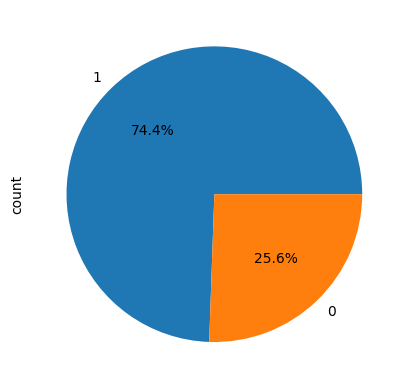

In [18]:
dataset["Malware"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.show()

#### Selecting Key Features Based on Importance Scores using randomforest 

In [10]:
X = dataset.drop(columns=['Name', 'Malware'])  #Droping this because classification model will not accept object type elements (float and int only)
y = dataset['Malware']

Isolates features by dropping the "Malware" target column, then stores feature names in feature_names for consistent reference in training and predictions.

The "Malware" column is dropped because it’s the target label that we’re trying to predict, not a feature. When training a model, only the features (input data) should be used to help the model learn, while the target column is used separately to evaluate its predictions.

In this case:

    Features (input data): The characteristics and attributes of the software file.
    Target (output label): The "Malware" column, which indicates whether the file is malware or benign.

Dropping "Malware" ensures that only the relevant inputs are used for training without including the label that the model is meant to predict.

In [11]:
# Spliting the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

                        Feature  Importance
25           MajorLinkerVersion    0.083446
36  MinorOperatingSystemVersion    0.080198
39        MajorSubsystemVersion    0.074482
46           SizeOfStackReserve    0.072692
19                TimeDateStamp    0.071122
..                          ...         ...
58            SectionMaxRawsize    0.000000
68              SectionMainChar    0.000000
66        SectionMinPointerData    0.000000
62           SectionMinPhysical    0.000000
64            SectionMinVirtual    0.000000

[77 rows x 2 columns]


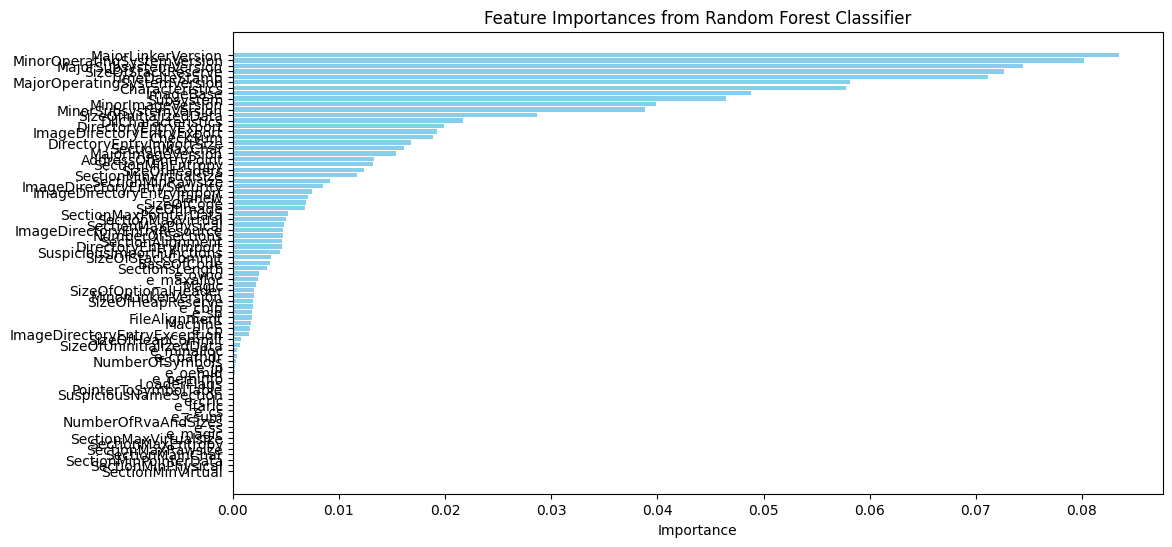

In [12]:
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Visualize Feature Importances
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Classifier')
plt.gca().invert_yaxis()  # Invert y axis to show the most important features at the top
plt.show()

Features selected (importance > 0.01):
['MajorLinkerVersion' 'MinorOperatingSystemVersion'
 'MajorSubsystemVersion' 'SizeOfStackReserve' 'TimeDateStamp'
 'MajorOperatingSystemVersion' 'Characteristics' 'ImageBase' 'Subsystem'
 'MinorImageVersion' 'MinorSubsystemVersion' 'SizeOfInitializedData'
 'DllCharacteristics' 'DirectoryEntryExport' 'ImageDirectoryEntryExport'
 'CheckSum' 'DirectoryEntryImportSize' 'SectionMaxChar'
 'MajorImageVersion' 'AddressOfEntryPoint' 'SectionMinEntropy'
 'SizeOfHeaders' 'SectionMinVirtualsize']


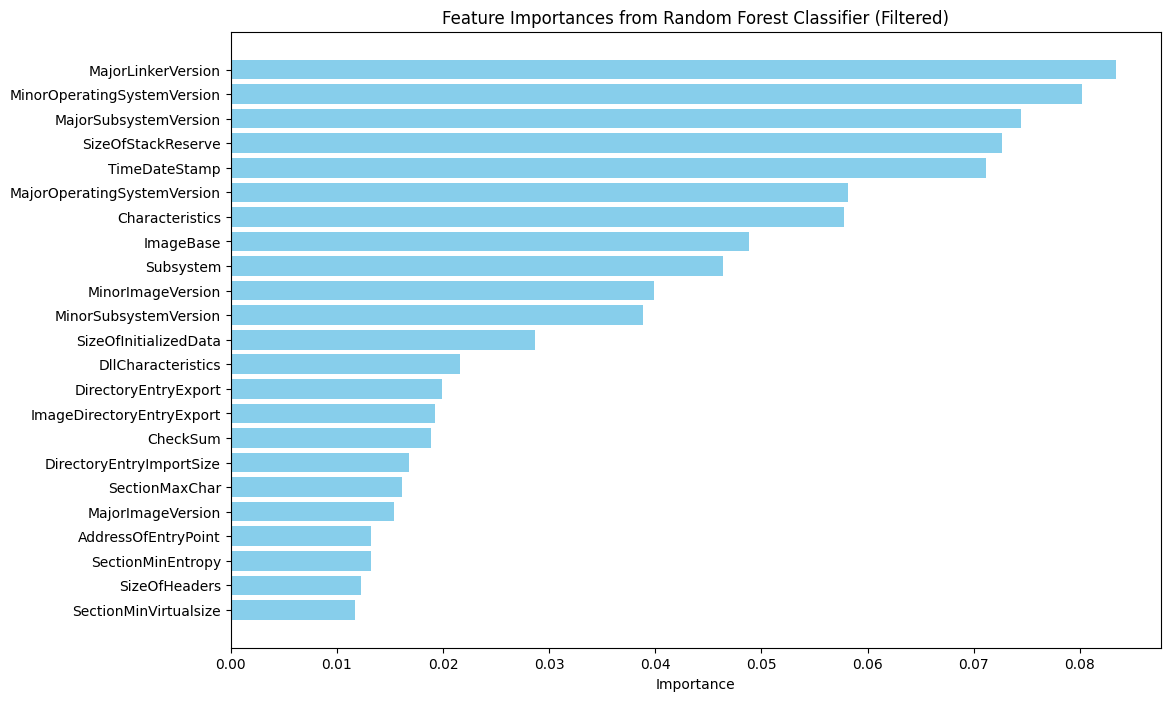

In [19]:
# Set the importance threshold
importance_threshold = 0.01

# Filter features based on the importance threshold
important_features = importance_df[importance_df['Importance'] > importance_threshold]['Feature']
print(f"Features selected (importance > {importance_threshold}):\n{important_features.values}")

# Visualize Feature Importances of Important Features
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'][importance_df['Importance'] > importance_threshold],
         importance_df['Importance'][importance_df['Importance'] > importance_threshold],
         color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Classifier (Filtered)')
plt.gca().invert_yaxis()  # Invert y axis to show the most important features at the top
plt.show()


save this filtered dataset to a CSV file

In [20]:
# To see the dataset with only the important features
# Create a new dataset with only the important features
important_features_list = important_features.tolist()  # Convert to list
important_features_dataset = dataset[important_features_list]  # Filter the dataset

# save this filtered dataset to a CSV file
important_features_dataset.to_csv('D:\volume E\ciphercop-2025\clone-detection\malware-detection\Malware-Detection-and-Analysis-using-Machine-Learning\Assets\Dataset\filtered_important_features_dataset.csv', index=False)

<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
C:\Users\M V KARTHIKEYA\AppData\Local\Temp\ipykernel_28380\4061253028.py:7: SyntaxWarning: invalid escape sequence '\c'
  important_features_dataset.to_csv('D:\volume E\ciphercop-2025\clone-detection\malware-detection\Malware-Detection-and-Analysis-using-Machine-Learning\Assets\Dataset\filtered_important_features_dataset.csv', index=False)


OSError: Cannot save file into a non-existent directory: 'D:olume E\ciphercop-2025\clone-detection\malware-detection\Malware-Detection-and-Analysis-using-Machine-Learning\Assets'

In [21]:
# Display the list of selected important features, one per line
print("Selected Important Features (importance > 0.01):")
for feature in important_features:
    print(feature) 
print(len(important_features))

Selected Important Features (importance > 0.01):
MajorLinkerVersion
MinorOperatingSystemVersion
MajorSubsystemVersion
SizeOfStackReserve
TimeDateStamp
MajorOperatingSystemVersion
Characteristics
ImageBase
Subsystem
MinorImageVersion
MinorSubsystemVersion
SizeOfInitializedData
DllCharacteristics
DirectoryEntryExport
ImageDirectoryEntryExport
CheckSum
DirectoryEntryImportSize
SectionMaxChar
MajorImageVersion
AddressOfEntryPoint
SectionMinEntropy
SizeOfHeaders
SectionMinVirtualsize
23


#### Testing which Classifiers will give better result

In [22]:
# Create training and testing datasets with only the important features
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

In [23]:
model = { "DecisionTree": DecisionTreeClassifier(max_depth=10),
         "RandomForest":ek.RandomForestClassifier(n_estimators=50)}

In [24]:
results = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train_important,y_train)
    score = clf.score(X_test_important,y_test)
    print ("%s : %s " %(algo, score))
    results[algo] = score

DecisionTree : 0.9892939077236809 
RandomForest : 0.9920978842722407 
RandomForest : 0.9920978842722407 


In [25]:
winner = max(results, key=results.get)# Selecting the classifier with good result
print("Using", winner, "for classification, with",len(important_features), 'features.')

Using RandomForest for classification, with 23 features.


😌Now it is clear that we should use RandomForest classification to our model since it gives a better result.

#### Training New Model Based on the important features

In [26]:
# Train a new model with only the important features
rf_model_filtered = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_filtered.fit(X_train_important, y_train)

# Predictions and Evaluation with important features
y_pred_filtered = rf_model_filtered.predict(X_test_important)
print(classification_report(y_test, y_pred_filtered, target_names=['Benign', 'Malware']))

              precision    recall  f1-score   support

      Benign       1.00      0.97      0.98      1003
     Malware       0.99      1.00      0.99      2920

    accuracy                           0.99      3923
   macro avg       0.99      0.99      0.99      3923
weighted avg       0.99      0.99      0.99      3923



#### Saving the model as malwareclassifier.pkl and features to be extracted as features

In [27]:
# Save the New trained model to a file
joblib.dump(rf_model_filtered, 'malwareclassifier-V2.pkl')

['malwareclassifier-V2.pkl']

#### Using Cross-Validation to Assess Model Performance

In [28]:
# Split training data further into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [25]:
# Evaluate training performance
train_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Training scores:", train_scores)
print("Average Training Score:", np.mean(train_scores))

# Evaluate validation performance through cross-validation
val_scores = cross_val_score(rf_model, X_val, y_val, cv=5)  
print("Validation scores:", val_scores)
print("Average Validation Score:", np.mean(val_scores))


Training scores: [0.99203187 0.99243028 0.99282869 0.99003984 0.98924303]
Average Training Score: 0.9913147410358565
Validation scores: [0.98566879 0.99203822 0.99203822 0.98245614 0.97926635]
Average Validation Score: 0.9862935421936427


Results show that both the training and validation scores are quite high, with the following insights:

    Training Scores: The model performs very well on the training set, averaging around 99.13%.

    Validation Scores: The validation performance is also high, averaging around 98.63%.
    
    Off by only 0.51% or 0.051....

Analysis

    No Overfitting: The training and validation scores are close, indicating that our model is likely not overfitting. If the training score were significantly higher than the validation score, it would suggest overfitting.
    
    Slight Underfitting Possibility: Since the validation score is a bit lower than the training score, it could indicate a small underfitting, but it’s minimal.

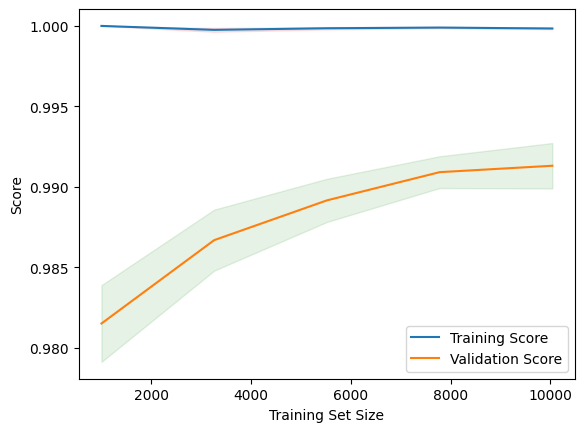

In [26]:
train_sizes, train_scores, val_scores = learning_curve(rf_model, X_train, y_train, cv=5, n_jobs=-1)

# Compute the average and standard deviation of train/validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")

plt.plot(train_sizes, val_mean, label='Validation Score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="g")

plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


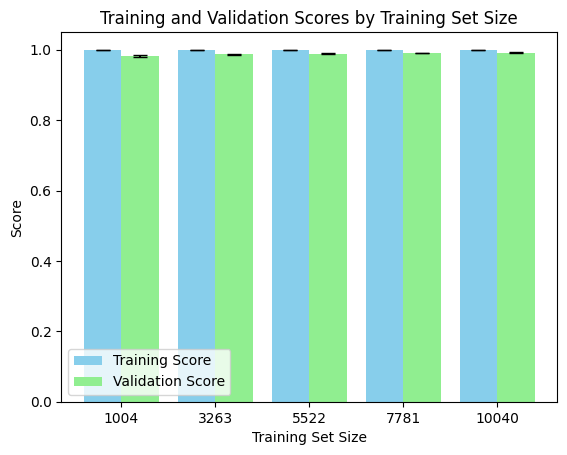

In [27]:
# Set bar width and positions
bar_width = 0.40
train_positions = np.arange(len(train_sizes))
val_positions = train_positions + bar_width

# Plot the bar chart with error bars
plt.bar(train_positions, train_mean, yerr=train_std, width=bar_width, label='Training Score', color='skyblue', capsize=5)
plt.bar(val_positions, val_mean, yerr=val_std, width=bar_width, label='Validation Score', color='lightgreen', capsize=5)

# Add labels and legend
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.xticks(train_positions + bar_width / 2, train_sizes)
plt.legend(loc='best')
plt.title('Training and Validation Scores by Training Set Size')

# Show the plot
plt.show()
